Initial dataset shape: (1005167, 5)
Initial dataset preview:
   product_number         department_desc  discount date_of_order  orders
0               0  MENS OWN BRAND BOTTOMS       0.0    2022-01-01       0
1               0  MENS OWN BRAND BOTTOMS       0.0    2022-01-02       0
2               0  MENS OWN BRAND BOTTOMS       0.0    2022-01-03       5
3               0  MENS OWN BRAND BOTTOMS       0.0    2022-01-04       0
4               0  MENS OWN BRAND BOTTOMS       0.0    2022-01-05       0
Dataset shape after removing duplicates: (1005167, 5)

Rows with Missing Dates (retained for now):
Empty DataFrame
Columns: [product_number, department_desc, discount, date_of_order, orders]
Index: []
Dataset shape after handling missing dates: (1005167, 5)

Handling Missing Values...
Remaining missing values after imputation:
product_number     0
department_desc    0
discount           0
date_of_order      0
orders             0
dtype: int64

Handling rows with the same date and different 

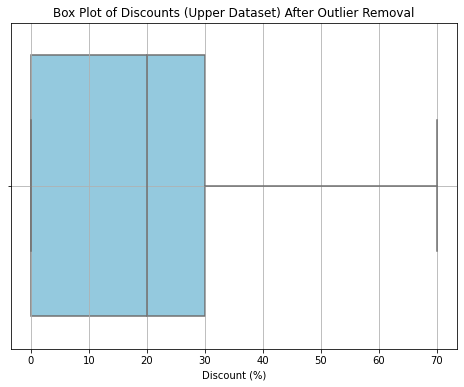

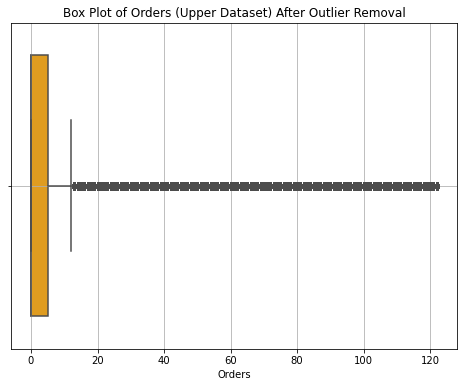

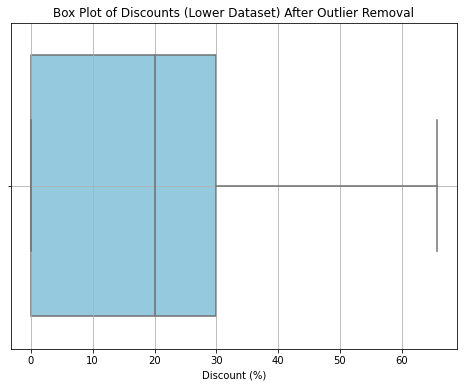

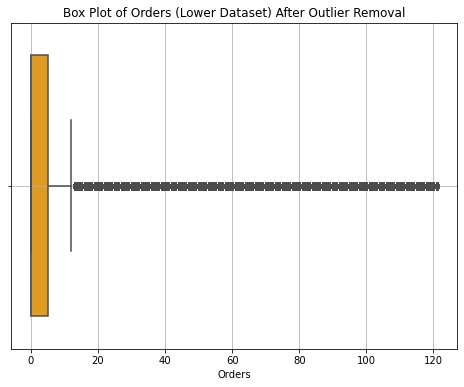

Data preprocessing completed successfully!


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '2022_orders_discount_data.csv'  # Replace with your file path
data_cleaned = pd.read_csv(file_path)
print(f"Initial dataset shape: {data_cleaned.shape}")
print(f"Initial dataset preview:\n{data_cleaned.head()}")

# 1. Remove duplicates
data_cleaned.drop_duplicates(inplace=True)
print(f"Dataset shape after removing duplicates: {data_cleaned.shape}")

# 2. Handle Missing Dates
# Convert `date_of_order` to datetime and set format explicitly to 'YYYY-MM-DD'
data_cleaned['date_of_order'] = pd.to_datetime(data_cleaned['date_of_order'], errors='coerce')

# Identify and print rows with missing dates
missing_date_rows = data_cleaned[data_cleaned['date_of_order'].isnull()]
print("\nRows with Missing Dates (retained for now):")
print(missing_date_rows)

# Replace missing dates with the earliest available date
data_cleaned['date_of_order'] = data_cleaned['date_of_order'].fillna(data_cleaned['date_of_order'].min())
print(f"Dataset shape after handling missing dates: {data_cleaned.shape}")

# 3. Handle Missing Values
print("\nHandling Missing Values...")

# Impute missing values for 'department_desc' with 'Unknown'
data_cleaned['department_desc'] = data_cleaned['department_desc'].fillna('Unknown')

# Impute missing values for 'discount' and 'orders' with their respective median
data_cleaned['discount'] = data_cleaned['discount'].fillna(data_cleaned['discount'].median())
data_cleaned['orders'] = data_cleaned['orders'].fillna(data_cleaned['orders'].median())

# Verify remaining missing values
print(f"Remaining missing values after imputation:\n{data_cleaned.isnull().sum()}")

# 4. Handle Rows with Same Date and Different Discounts
print("\nHandling rows with the same date and different discounts...")
grouped_data = data_cleaned.groupby(['product_number', 'date_of_order'])

# Extract rows with the highest and lowest discounts for each product and date
upper_value_data = grouped_data.apply(lambda x: x.loc[x['discount'].idxmax()]).reset_index(drop=True)
lower_value_data = grouped_data.apply(lambda x: x.loc[x['discount'].idxmin()]).reset_index(drop=True)

print(f"Upper Value Dataset Shape: {upper_value_data.shape}")
print(f"Lower Value Dataset Shape: {lower_value_data.shape}")

# 5. Custom Outlier Removal using Percentiles
def remove_outliers_custom(df, column, lower_percentile, upper_percentile):
    """
    Removes outliers based on percentile thresholds.
    Arguments:
    df : pandas.DataFrame - Input dataframe.
    column : str - Column name for which outliers need to be removed.
    lower_percentile : int - Lower percentile for threshold (default=1).
    upper_percentile : int - Upper percentile for threshold (default=99).
    Returns:
    pandas.DataFrame - DataFrame with outliers removed.
    """
    lower_bound = np.percentile(df[column], lower_percentile)
    upper_bound = np.percentile(df[column], upper_percentile)
    print(f"Outlier removal thresholds for {column}: Lower = {lower_bound}, Upper = {upper_bound}")
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Before outlier removal
print("\nUpper Value Data Before Outlier Removal:")
print(upper_value_data[['discount', 'orders']].describe())

print("\nLower Value Data Before Outlier Removal:")
print(lower_value_data[['discount', 'orders']].describe())

# Remove outliers
print("\nRemoving outliers from both datasets...")
original_shape_upper = upper_value_data.shape
original_shape_lower = lower_value_data.shape
upper_value_data = remove_outliers_custom(upper_value_data, 'discount', lower_percentile=1, upper_percentile=99)
upper_value_data = remove_outliers_custom(upper_value_data, 'orders', lower_percentile=1, upper_percentile=99)
lower_value_data = remove_outliers_custom(lower_value_data, 'discount', lower_percentile=1, upper_percentile=99)
lower_value_data = remove_outliers_custom(lower_value_data, 'orders', lower_percentile=1, upper_percentile=99)

print(f"Upper dataset shape before: {original_shape_upper}, after: {upper_value_data.shape}")
print(f"Lower dataset shape before: {original_shape_lower}, after: {lower_value_data.shape}")

# After outlier removal
print("\nUpper Value Data After Outlier Removal:")
print(upper_value_data[['discount', 'orders']].describe())

print("\nLower Value Data After Outlier Removal:")
print(lower_value_data[['discount', 'orders']].describe())

# 6. Box Plots for Visualization
# Box plot for discounts in the upper dataset after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=upper_value_data['discount'], color='skyblue')
plt.title('Box Plot of Discounts (Upper Dataset) After Outlier Removal')
plt.xlabel('Discount (%)')
plt.grid(True)
plt.show()

# Box plot for orders in the upper dataset after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=upper_value_data['orders'], color='orange')
plt.title('Box Plot of Orders (Upper Dataset) After Outlier Removal')
plt.xlabel('Orders')
plt.grid(True)
plt.show()

# Box plot for discounts in the lower dataset after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=lower_value_data['discount'], color='skyblue')
plt.title('Box Plot of Discounts (Lower Dataset) After Outlier Removal')
plt.xlabel('Discount (%)')
plt.grid(True)
plt.show()

# Box plot for orders in the lower dataset after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=lower_value_data['orders'], color='orange')
plt.title('Box Plot of Orders (Lower Dataset) After Outlier Removal')
plt.xlabel('Orders')
plt.grid(True)
plt.show()

print("Data preprocessing completed successfully!")


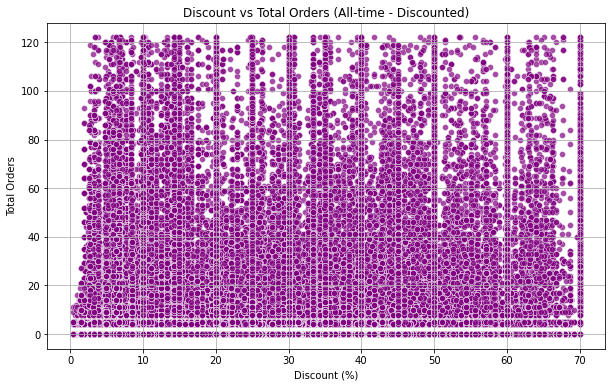

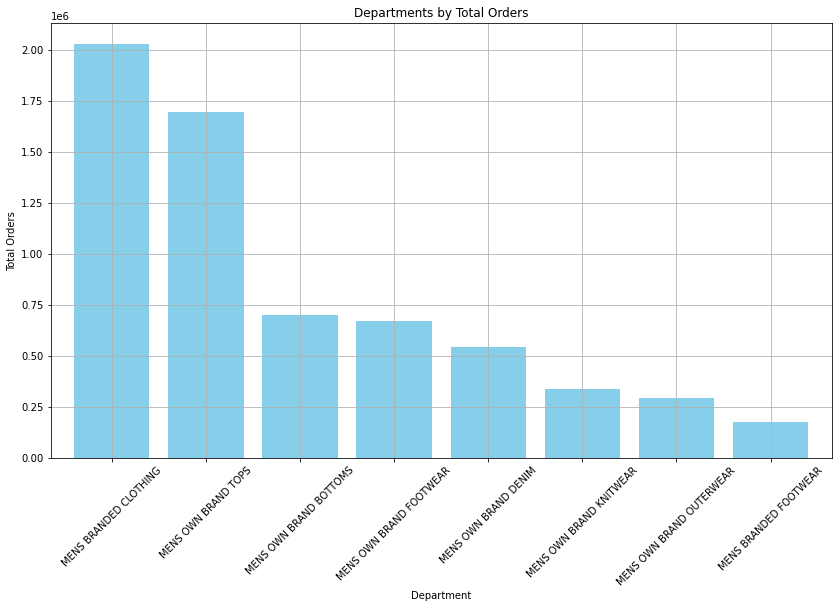

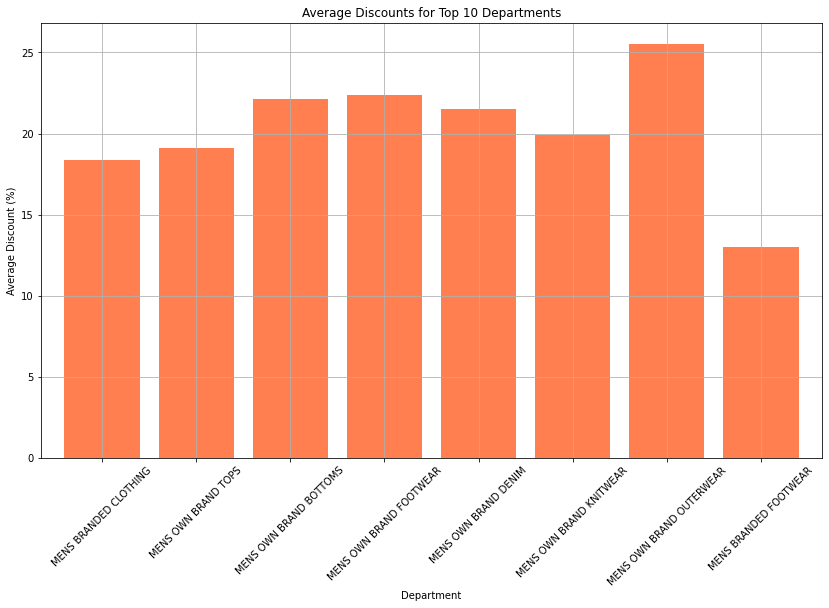

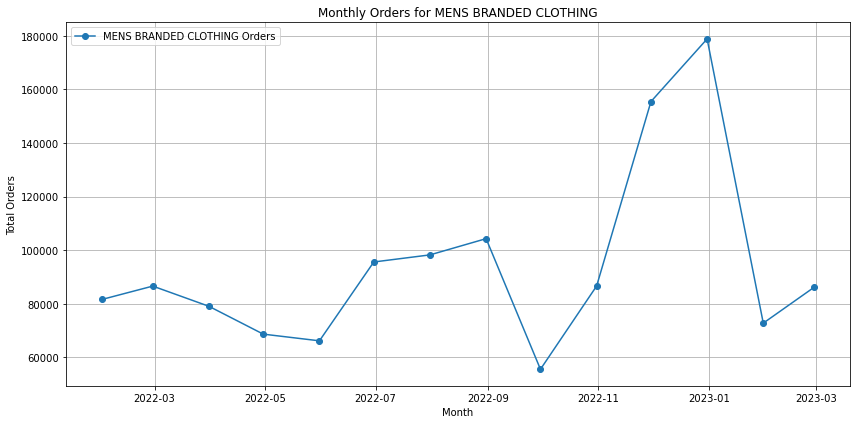

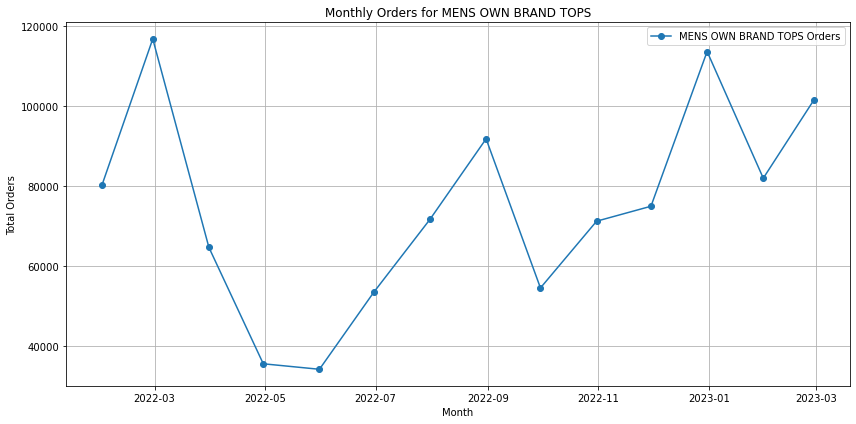

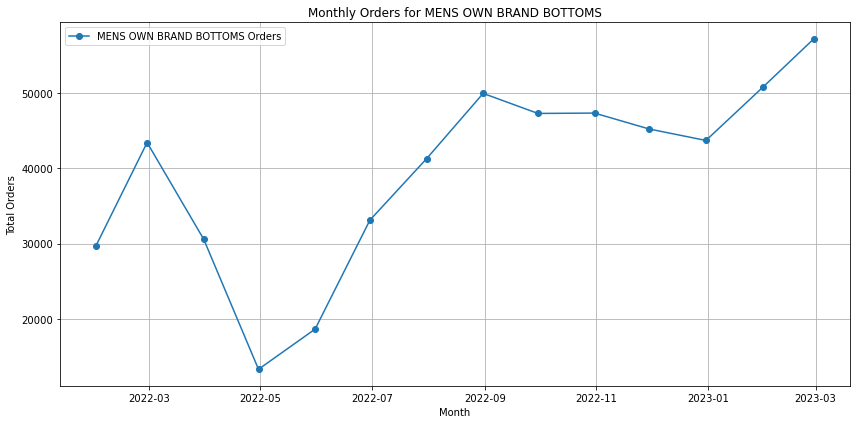

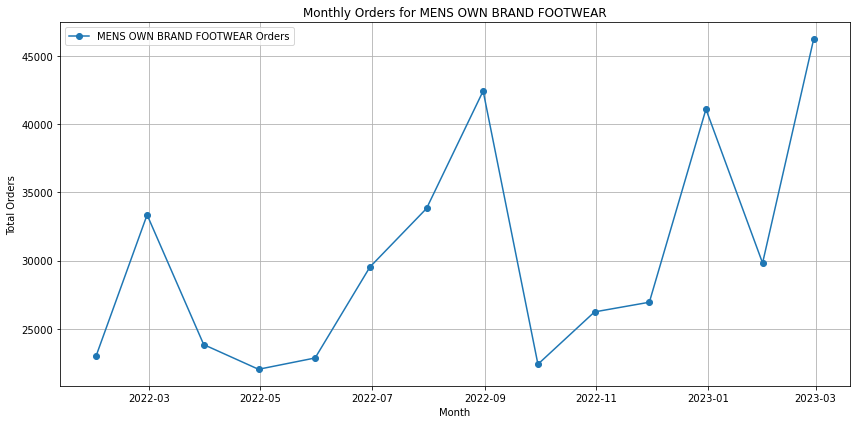

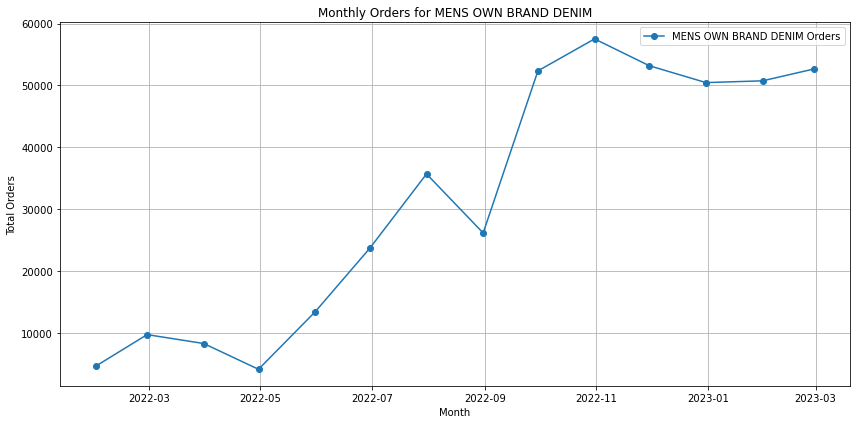

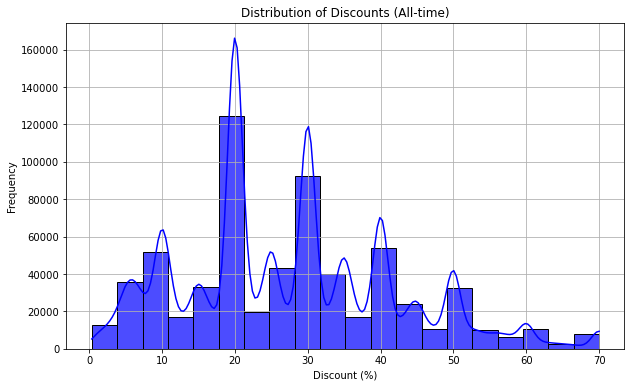

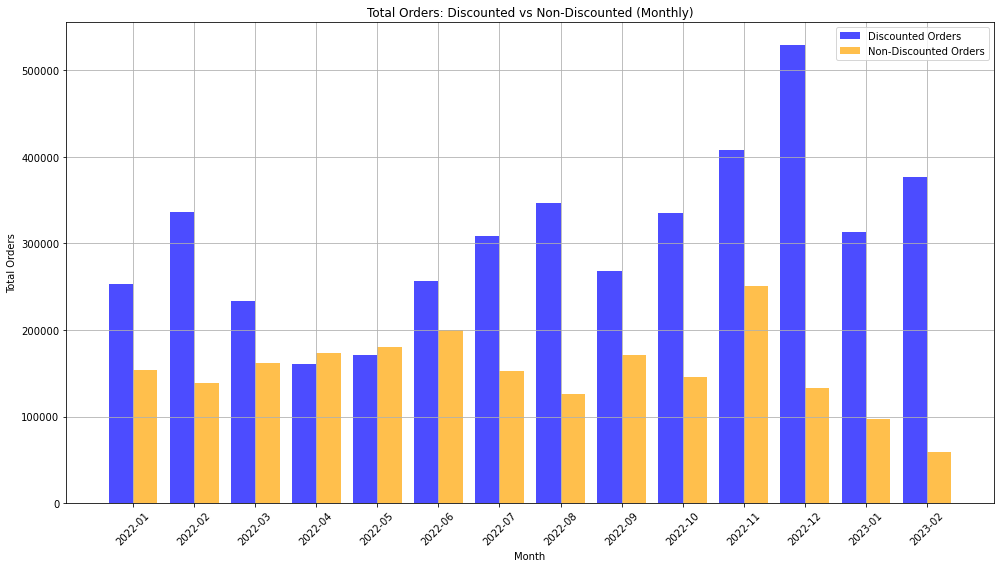

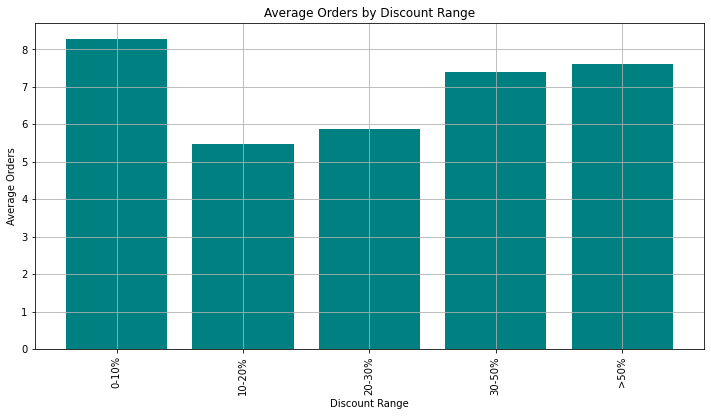

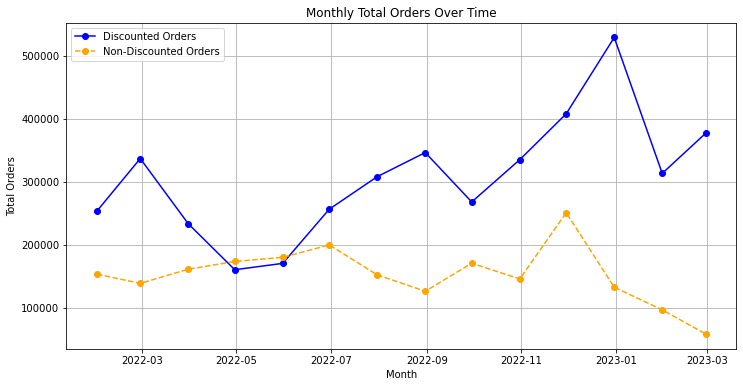

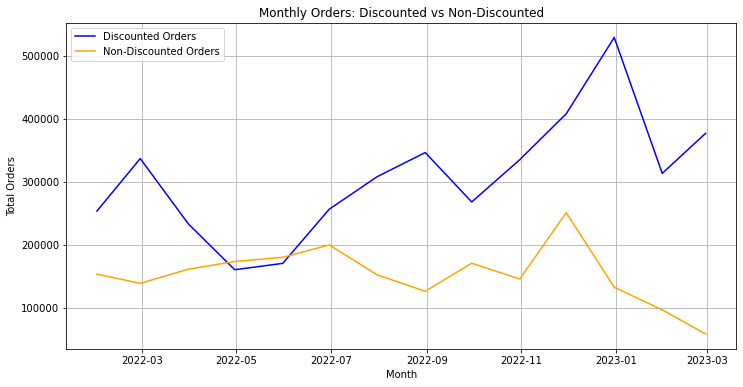

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load cleaned data
file_path = 'cleaned_orders_discount_data_upper.csv'
data_cleaned = pd.read_csv(file_path)

# Ensure the date column is datetime
data_cleaned['date_of_order'] = pd.to_datetime(data_cleaned['date_of_order'])

# Validate discount segregation
if not all(data_cleaned['discount'] >= 0):
    raise ValueError("Discount column contains negative values, which are invalid.")

# Separate discounted and non-discounted data
discounted_data = data_cleaned[data_cleaned['discount'] > 0]
non_discounted_data = data_cleaned[data_cleaned['discount'] == 0]

# Aggregate data monthly for discounted and non-discounted separately
discounted_monthly = discounted_data.resample('M', on='date_of_order').agg({
    'orders': 'sum',
    'discount': 'mean'
}).reset_index()

non_discounted_monthly = non_discounted_data.resample('M', on='date_of_order').agg({
    'orders': 'sum'
}).reset_index()

# Merge the two datasets for analysis
monthly_data = pd.merge(
    discounted_monthly,
    non_discounted_monthly,
    on='date_of_order',
    how='outer',
    suffixes=('_discounted', '_non_discounted')
)

# Replace NaN with 0 to handle months without any orders for a specific category
monthly_data.fillna(0, inplace=True)

# Add discount range for analysis (for discounted data only)
bins = [0, 10, 20, 30, 50, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-50%', '>50%']
if 'discount_discounted' in monthly_data.columns:
    monthly_data['discount_range'] = pd.cut(monthly_data['discount_discounted'], bins=bins, labels=labels)

### 1. Discount vs Orders Scatter Plot (All-time Aggregation)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount', y='orders', data=discounted_data, alpha=0.7, color="purple")
plt.title('Discount vs Total Orders (All-time - Discounted)')
plt.xlabel('Discount (%)')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()

### 2. Top Departments by Total Orders (Granular Analysis)
dept_aggregated = data_cleaned.groupby('department_desc').agg({
    'orders': 'sum',
    'discount': 'mean'
}).sort_values(by='orders', ascending=False)

# Top 10 Departments by Total Orders
plt.figure(figsize=(14, 8))
dept_aggregated['orders'].head(10).plot(kind='bar', color='skyblue', width=0.8)
plt.title('Departments by Total Orders')
plt.xlabel('Department')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Average Discounts for Top 10 Departments
plt.figure(figsize=(14, 8))
dept_aggregated['discount'].head(10).plot(kind='bar', color='coral', width=0.8)
plt.title('Average Discounts for Top 10 Departments')
plt.xlabel('Department')
plt.ylabel('Average Discount (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 3. Monthly Department-Level Analysis
top_departments = dept_aggregated.head(5).index

# For each department, plot monthly discounted orders
for department in top_departments:
    dept_data = discounted_data[discounted_data['department_desc'] == department]
    dept_monthly = dept_data.resample('M', on='date_of_order').agg({
        'orders': 'sum',
        'discount': 'mean'
    }).reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.plot(dept_monthly['date_of_order'], dept_monthly['orders'], marker='o', label=f'{department} Orders')
    plt.title(f'Monthly Orders for {department}')
    plt.xlabel('Month')
    plt.ylabel('Total Orders')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 4. Distribution of Discounts (Granular)
plt.figure(figsize=(10, 6))
sns.histplot(discounted_data['discount'], bins=20, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Discounts (All-time)')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 5. Discounted vs Non-Discounted Sales (Monthly)
plt.figure(figsize=(14, 8))
x_positions = np.arange(len(monthly_data['date_of_order']))
plt.bar(
    x_positions - 0.2,
    monthly_data['orders_discounted'],
    width=0.4,
    label='Discounted Orders',
    color='blue',
    alpha=0.7
)
plt.bar(
    x_positions + 0.2,
    monthly_data['orders_non_discounted'],
    width=0.4,
    label='Non-Discounted Orders',
    color='orange',
    alpha=0.7
)
plt.xticks(x_positions, monthly_data['date_of_order'].dt.strftime('%Y-%m'), rotation=45)
plt.title('Total Orders: Discounted vs Non-Discounted (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 6. Average Orders by Discount Range
avg_orders_by_discount = discounted_data.groupby(pd.cut(discounted_data['discount'], bins=bins, labels=labels))['orders'].mean()

plt.figure(figsize=(12, 6))
avg_orders_by_discount.plot(kind='bar', color='teal', width=0.8)
plt.title('Average Orders by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Average Orders')
plt.grid(True)
plt.show()

### 7. Monthly Total Orders Over Time
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['date_of_order'], monthly_data['orders_discounted'], marker='o', color='blue', label='Discounted Orders')
plt.plot(monthly_data['date_of_order'], monthly_data['orders_non_discounted'], marker='o', linestyle='--', color='orange', label='Non-Discounted Orders')
plt.title('Monthly Total Orders Over Time')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.legend()
plt.grid(True)
plt.show()

### 8. Monthly Orders: Discounted vs Non-Discounted (Granular Line Plot)
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_of_order', y='orders_discounted', data=monthly_data, label='Discounted Orders', color='blue')
sns.lineplot(x='date_of_order', y='orders_non_discounted', data=monthly_data, label='Non-Discounted Orders', color='orange')
plt.title('Monthly Orders: Discounted vs Non-Discounted')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.legend()
plt.grid(True)
plt.show()



Dataset loaded successfully.
Number of unique departments: 8
List of all departments:
['MENS OWN BRAND BOTTOMS' 'MENS OWN BRAND FOOTWEAR'
 'MENS BRANDED FOOTWEAR' 'MENS BRANDED CLOTHING' 'MENS OWN BRAND TOPS'
 'MENS OWN BRAND OUTERWEAR' 'MENS OWN BRAND DENIM'
 'MENS OWN BRAND KNITWEAR']
Date column converted to datetime.
Data aggregated to weekly level.
Zero discounts replaced with a small value.
Percentage changes calculated.
Elasticity calculated.
Extreme values removed, and positive elasticities filtered.
Product elasticity data saved to: top_products_elasticity_cleaned_weekly.csv
Department elasticity data saved to: department_elasticity_weekly.csv
Seasonal decomposition completed successfully.
Seasonal trend analysis completed.
Enhanced product data saved to: enhanced_product_data_without_seasonality_weekly.csv


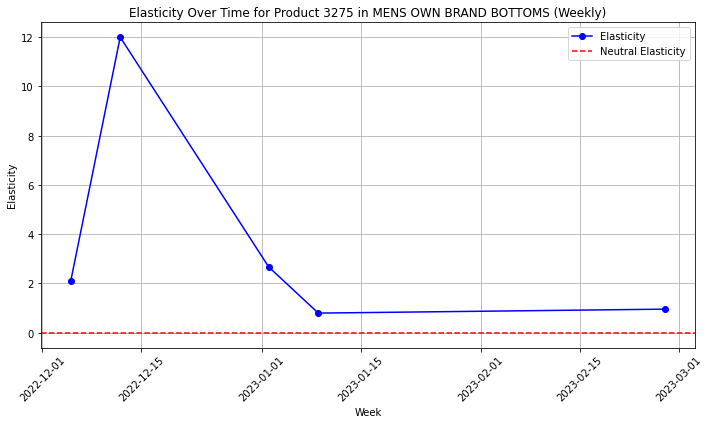

Elasticity graph plotted for all weeks for a sample product-department.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load the dataset
file_path = 'cleaned_orders_discount_data_upper.csv'  # Replace with your file path
data_cleaned = pd.read_csv(file_path)
print("Dataset loaded successfully.")

# Step 2: Explore the dataset
unique_departments = data_cleaned['department_desc'].nunique()
department_list = data_cleaned['department_desc'].unique()
print(f"Number of unique departments: {unique_departments}")
print("List of all departments:")
print(department_list)

# Step 3: Data Cleaning
data_cleaned['date_of_order'] = pd.to_datetime(data_cleaned['date_of_order'])
print("Date column converted to datetime.")

# Step 4: Aggregate data at the weekly level
data_cleaned['week'] = data_cleaned['date_of_order'].dt.to_period('W-SUN')  # Weekly periods ending on Sunday
weekly_data = data_cleaned.groupby(['week', 'department_desc', 'product_number']).agg({
    'orders': 'sum',
    'discount': 'mean'
}).reset_index()
print("Data aggregated to weekly level.")

# Step 5: Handle division by zero for elasticity calculation
weekly_data['discount'] = weekly_data['discount'].replace(0, 1e-6)
print("Zero discounts replaced with a small value.")

# Step 6: Calculate percentage changes
weekly_data['pct_change_discount'] = weekly_data.groupby('product_number')['discount'].pct_change()
weekly_data['pct_change_orders'] = weekly_data.groupby('product_number')['orders'].pct_change()
print("Percentage changes calculated.")

# Step 7: Elasticity Calculation
weekly_data['elasticity'] = np.where(
    (weekly_data['pct_change_discount'] != 0) & (weekly_data['pct_change_orders'].notnull()),
    weekly_data['pct_change_orders'] / weekly_data['pct_change_discount'],
    np.nan
)
print("Elasticity calculated.")

# Step 8: Handle extreme values and filter positive elasticities
weekly_data['elasticity'] = np.where(
    weekly_data['elasticity'].abs() > 200000000000, np.nan, weekly_data['elasticity']
)
weekly_data = weekly_data[weekly_data['elasticity'] > 0]
print("Extreme values removed, and positive elasticities filtered.")

# Step 9: Product-Level Elasticity
product_elasticity = weekly_data.groupby(['product_number', 'department_desc'])['elasticity'].mean().sort_values(ascending=False).dropna()
top_products = product_elasticity.reset_index()
output_file_path = 'top_products_elasticity_cleaned_weekly.csv'
top_products.to_csv(output_file_path, index=False)
print(f"Product elasticity data saved to: {output_file_path}")

# Step 10: Department-Level Elasticity
department_elasticity = weekly_data.groupby('department_desc')['elasticity'].mean().sort_values(ascending=False).dropna().reset_index()
department_elasticity = department_elasticity[department_elasticity['elasticity'] > 0]
department_elasticity.columns = ['department_desc', 'average_elasticity']
department_output_file_path = 'department_elasticity_weekly.csv'
department_elasticity.to_csv(department_output_file_path, index=False)
print(f"Department elasticity data saved to: {department_output_file_path}")

# Step 11: Seasonal Trend Analysis
# Aggregate data for seasonal decomposition
seasonal_data = weekly_data.groupby('week').agg({'orders': 'sum'}).reset_index()
seasonal_data['week'] = seasonal_data['week'].apply(lambda x: x.start_time)

# Check and handle missing values in orders
seasonal_data['orders'] = seasonal_data['orders'].fillna(0)

# Smooth data to reduce sparsity
seasonal_data['orders_smoothed'] = seasonal_data['orders'].rolling(window=4, min_periods=1).mean()

# Perform seasonal decomposition with adjusted period
try:
    seasonal_decomp = seasonal_decompose(seasonal_data.set_index('week')['orders_smoothed'], model='additive', period=13)

    # Add seasonal, trend, and residual components back to the dataset
    seasonal_data['seasonal'] = seasonal_decomp.seasonal
    seasonal_data['trend'] = seasonal_decomp.trend
    seasonal_data['residual'] = seasonal_decomp.resid

    print("Seasonal decomposition completed successfully.")
except ValueError as e:
    print(f"Error in seasonal decomposition: {e}")

# Merge seasonal data back into the main dataset
weekly_data = pd.merge(weekly_data, seasonal_data, on='week', how='left')
print("Seasonal trend analysis completed.")

# Step 12: Save Enhanced Data
columns_to_exclude = ['seasonal', 'trend', 'residual']  # Exclude these columns
filtered_weekly_data = weekly_data.drop(columns=columns_to_exclude, errors='ignore')
final_data_path = 'enhanced_product_data_without_seasonality_weekly.csv'
filtered_weekly_data.to_csv(final_data_path, index=False)
print(f"Enhanced product data saved to: {final_data_path}")

# Visualization of Elasticity for All Weeks for a Sample Product-Department
sample_data = weekly_data[(weekly_data['department_desc'] == 'MENS OWN BRAND BOTTOMS') & 
                          (weekly_data['product_number'] == 3275)]
sample_data = sample_data.sort_values(by='week')
sample_data['week'] = sample_data['week'].apply(lambda x: x.start_time)

plt.figure(figsize=(10, 6))
plt.plot(sample_data['week'], sample_data['elasticity'], marker='o', color='blue', label='Elasticity')
plt.axhline(y=0, color='red', linestyle='--', label='Neutral Elasticity')
plt.title('Elasticity Over Time for Product 3275 in MENS OWN BRAND BOTTOMS (Weekly)')
plt.xlabel('Week')
plt.ylabel('Elasticity')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
print("Elasticity graph plotted for all weeks for a sample product-department.")


Enhanced dataset loaded successfully.
Columns in the dataset: ['week', 'department_desc', 'product_number', 'orders_x', 'discount', 'pct_change_discount', 'pct_change_orders', 'elasticity', 'orders_y', 'orders_smoothed', 'seasonal', 'trend', 'residual']
Selected features: ['elasticity', 'discount']
Target variable: orders_x
Train-test split completed.
Training Linear Regression...


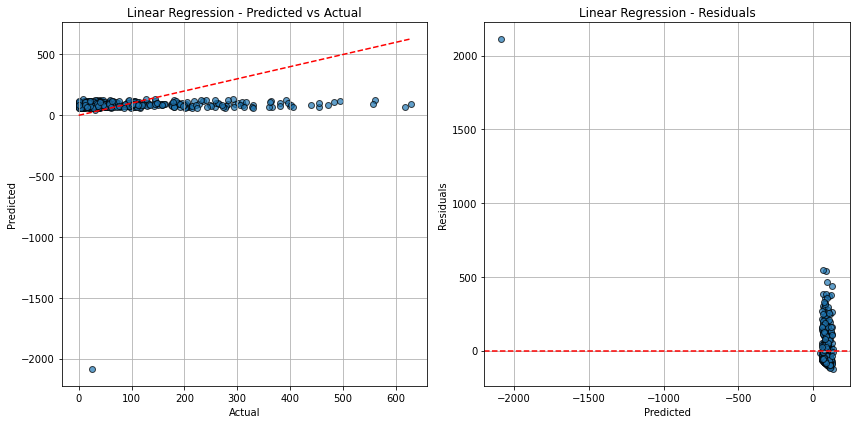

Linear Regression Results - RMSE: 149.32, MAE: 84.09, R2: -0.77
Training Lasso Regression...


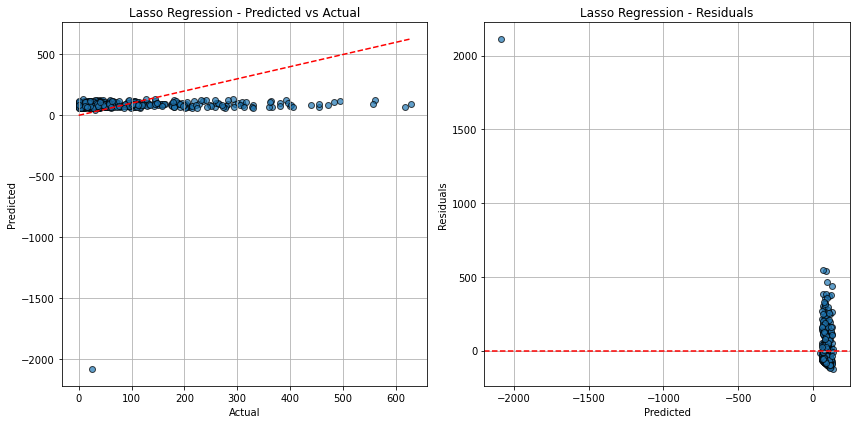

Lasso Regression Results - RMSE: 149.31, MAE: 84.09, R2: -0.77
Training Decision Tree...


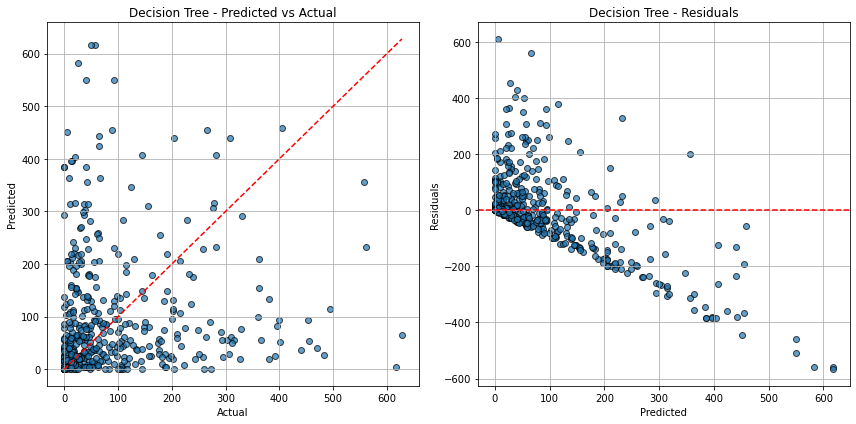

Decision Tree Results - RMSE: 153.14, MAE: 100.64, R2: -0.86
Training Random Forest...


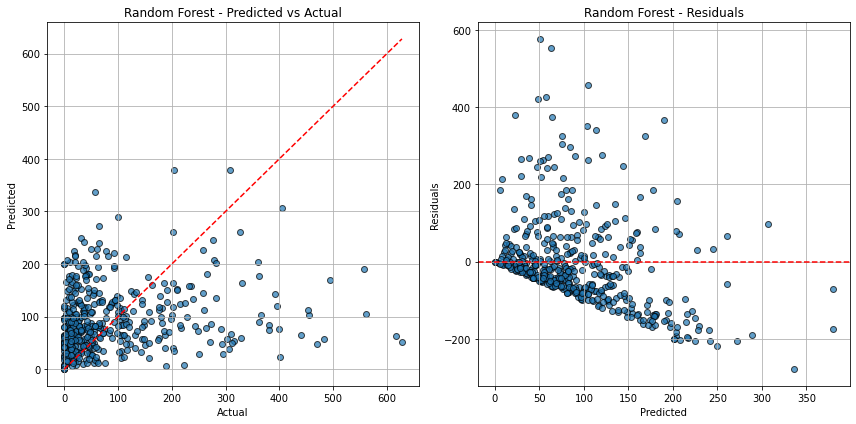

Random Forest Results - RMSE: 117.96, MAE: 82.36, R2: -0.10
Training Gradient Boosting...


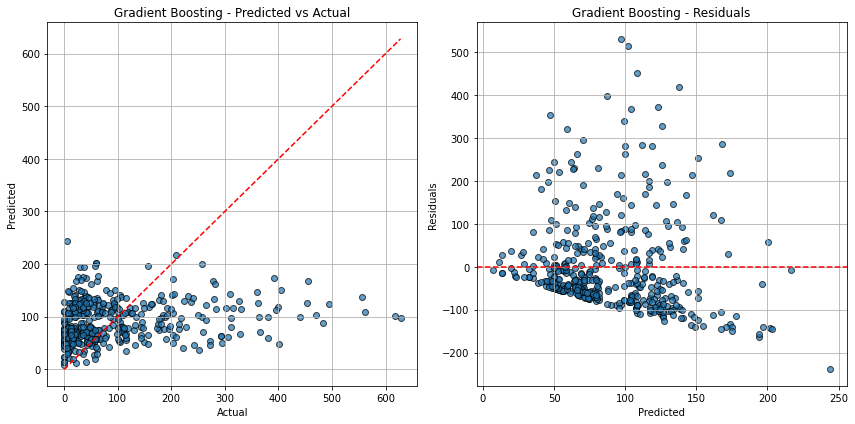

Gradient Boosting Results - RMSE: 110.16, MAE: 79.30, R2: 0.04
Training Bayesian Ridge...


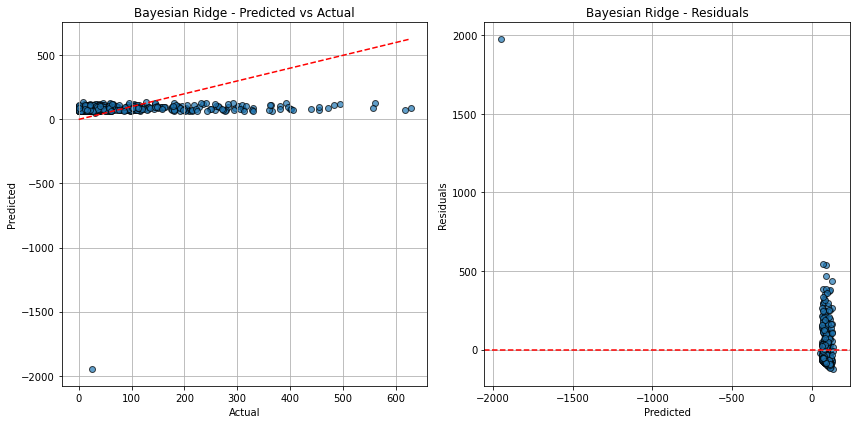

Bayesian Ridge Results - RMSE: 145.05, MAE: 83.83, R2: -0.67

Model Evaluation Results:
Linear Regression: RMSE = 149.32, MAE = 84.09, R2 = -0.77
Lasso Regression: RMSE = 149.31, MAE = 84.09, R2 = -0.77
Decision Tree: RMSE = 153.14, MAE = 100.64, R2 = -0.86
Random Forest: RMSE = 117.96, MAE = 82.36, R2 = -0.10
Gradient Boosting: RMSE = 110.16, MAE = 79.30, R2 = 0.04
Bayesian Ridge: RMSE = 145.05, MAE = 83.83, R2 = -0.67

Best Model: Gradient Boosting
Predictions saved to: filtered_product_sales_predictions.csv


/var/folders/9f/n8pgr0_15654ldxhrw2r59t80000gn/T/ipykernel_35093/3545287366.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['predicted_orders'] = best_model.predict(X)


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the enhanced dataset
data_path = 'enhanced_product_data_with_seasonality_weekly.csv'  # Use your file path
data = pd.read_csv(data_path)
print("Enhanced dataset loaded successfully.")
print(f"Columns in the dataset: {data.columns.tolist()}")

# Step 2: Select features and target variable
features = ['elasticity', 'discount']  # Excluding seasonal, trend, residual for now
target = 'orders_x'  # Using raw orders data; adjust if needed
print(f"Selected features: {features}")
print(f"Target variable: {target}")

# Step 4: Train-test split with filtering
# Optionally filter products/departments for more focused analysis
filtered_data = data[data['department_desc'] == 'MENS OWN BRAND BOTTOMS']  # Example filter
if filtered_data.empty:
    raise ValueError("Filtered dataset is empty. Adjust filtering conditions.")

X = filtered_data[features]
y = filtered_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train-test split completed.")

# Step 5: Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.01),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_jobs=-1, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Bayesian Ridge': BayesianRidge()
}

# Step 6: Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    
    # Visualizations for the model
    plt.figure(figsize=(12, 6))
    
    # Plot predicted vs actual values
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
    plt.title(f"{name} - Predicted vs Actual")
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid()
    
    # Plot residuals
    residuals = y_test - y_pred
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.7, edgecolor='k')
    plt.axhline(y=0, color='red', linestyle='--')  # Reference line
    plt.title(f"{name} - Residuals")
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    
    print(f"{name} Results - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")

# Step 7: Display results
print("\nModel Evaluation Results:")
for name, metrics in results.items():
    print(f"{name}: RMSE = {metrics['RMSE']:.2f}, MAE = {metrics['MAE']:.2f}, R2 = {metrics['R2']:.2f}")

# Step 8: Save predictions from the best model
best_model_name = max(results, key=lambda x: results[x]['R2'])  # Find model with highest R2
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")
best_model.fit(X_train, y_train)
filtered_data['predicted_orders'] = best_model.predict(X)

# Save the dataset with predictions
predictions_path = 'filtered_product_sales_predictions.csv'
filtered_data.to_csv(predictions_path, index=False)
print(f"Predictions saved to: {predictions_path}")
